In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [6]:
tmp = np.array([1,2,3])
function = lambda x: x**3
#tmp_cubed = function(tmp)
#tmp['power_3'] = tmp_cubed
#print(tmp)
#print(tmp_cubed)

In [7]:
tmp
df = pd.DataFrame({'original':tmp})
df['power_2'] = df['original'].apply(lambda x:x**2)
name = 'power_3'
df[name] = df['original'].apply(lambda x:x**3)
df

,original,power_2,power_3
0,1,1,1
1,2,4,8
2,3,9,27


In [8]:
def polynomial_sframe(feature, degree):
    df = pd.DataFrame({'power_1':feature})
    if degree > 1:
        for d in range(2,degree+1):
            name = 'power_' + str(d)
            df[name] = df['power_1'].apply(lambda x:x**d)
    return df

In [9]:
polynomial_sframe(tmp,3)

,power_1,power_2,power_3
0,1,1,1
1,2,4,8
2,3,9,27


In [10]:
sales = pd.read_csv("~/Desktop/ML_Washington/WashingtonML/Regression/Week2/kc_house_data.csv")

In [11]:
sales = sales.sort_values(['sqft_living','price'])

In [12]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [13]:
#sales = sales.sort(['sqft_living', 'price'])
poly1_data = polynomial_sframe(sales['sqft_living'],1)
poly1_data['price'] = sales['price']

In [14]:
poly1_data.head()

,power_1,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0


In [15]:
regressor = LinearRegression()
model1 = regressor.fit(poly1_data['power_1'].values.reshape(-1,1), poly1_data['price'].values.reshape(-1,1))

In [16]:
print(regressor.intercept_)
print(regressor.coef_)

[-43580.74309447]
[[280.6235679]]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

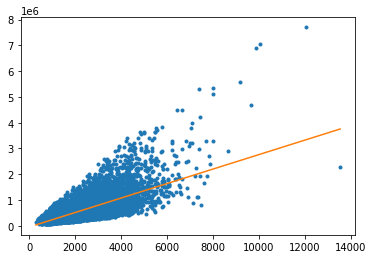

In [18]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape(-1,1)),'-')

In [19]:
poly2_data = polynomial_sframe(sales['sqft_living'],2)
poly2_data['price'] = sales['price']

In [20]:
poly2_data.head()

,power_1,power_2,price
19452,290,84100,142000.0
15381,370,136900,276000.0
860,380,144400,245000.0
18379,384,147456,265000.0
4868,390,152100,228000.0


In [21]:
model2 = regressor.fit(poly2_data[['power_1','power_2']], poly2_data['price'].values.reshape(-1,1))

In [22]:
print(model2.intercept_)
print(model2.coef_)

[199222.27930548]
[[6.79940947e+01 3.85812609e-02]]


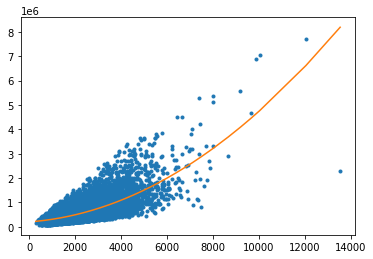

In [23]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data[['power_1','power_2']]),'-')

In [24]:
poly3_data = polynomial_sframe(sales['sqft_living'],3)
poly3_data['price'] = sales['price']

In [25]:
poly3_data.head()
poly3_data.iloc[:,0:3]
poly3_data.columns

Index(['power_1', 'power_2', 'power_3', 'price'], dtype='object')

In [26]:
model3 = regressor.fit(poly3_data[['power_1','power_2','power_3']], poly2_data['price'].values.reshape(-1,1))

In [27]:
print(model3.intercept_)
print(model3.coef_)

[336819.74821982]
[[-9.01819864e+01  8.70465089e-02 -3.84055260e-06]]


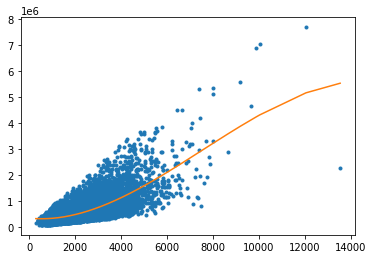

In [28]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
         poly3_data['power_1'], model3.predict(poly3_data[['power_1','power_2','power_3']]),'-')

[537116.32963788]
[[ 4.56404164e-91 -6.23779017e-50  2.87780910e-56 -2.48920611e-60
   1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
   1.47144115e-59  1.09771012e-55  7.43509038e-52  4.23015577e-48
   1.61618577e-44 -2.49283826e-48  9.59718336e-53]]


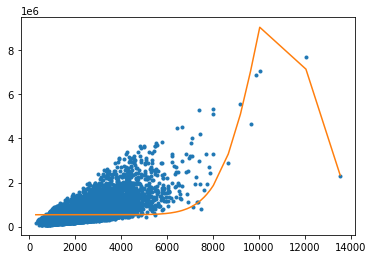

In [29]:
poly15_data = polynomial_sframe(sales['sqft_living'],15)
poly15_data['price'] = sales['price']
model15 = regressor.fit(poly15_data.iloc[:,0:15], poly15_data['price'].values.reshape(-1,1))
print(model15.intercept_)
print(model15.coef_)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(poly15_data.iloc[:,0:15]),'-')

In [30]:
set_a, set_b = train_test_split(sales, test_size = 0.5, random_state = 0)

In [31]:
set_1, set_2 = train_test_split(set_a, test_size = 0.5, random_state = 0)
set_3, set_4 = train_test_split(set_b, test_size = 0.5, random_state = 0)

In [32]:
print(set_1.shape, set_2.shape, set_3.shape, set_4.shape)

(5403, 21) (5403, 21) (5403, 21) (5404, 21)


In [33]:
set_1 = set_1.sort_values(['sqft_living','price'])
set_2 = set_2.sort_values(['sqft_living','price'])
set_3 = set_3.sort_values(['sqft_living','price'])
set_4 = set_4.sort_values(['sqft_living','price'])

[506376.79324809]
[[ 1.54932920e-77 -7.64788570e-39  6.63713355e-46 -2.51424754e-50
   1.04404871e-53  2.61021625e-54  2.56931963e-55  1.09262703e-51
   4.30695785e-48  1.50527733e-44  4.26176048e-41  7.63075857e-38
  -2.82776370e-41  3.47267334e-45 -1.41118845e-49]]


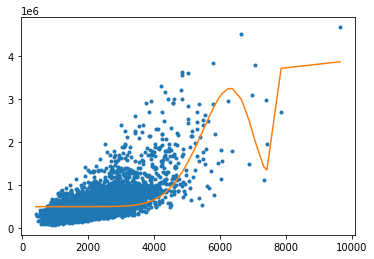

In [34]:
poly_set_1 = polynomial_sframe(set_1['sqft_living'],15)
poly_set_1['price'] = set_1['price']
model_set_1 = regressor.fit(poly_set_1.iloc[:,0:15], poly_set_1['price'].values.reshape(-1,1))
print(model_set_1.intercept_)
print(model_set_1.coef_)
plt.plot(poly_set_1['power_1'],poly_set_1['price'],'.',
         poly_set_1['power_1'], model_set_1.predict(poly_set_1.iloc[:,0:15]),'-')

[508319.40258126]
[[ 2.06673026e-77 -9.68548841e-40 -1.00738989e-44 -1.05325267e-49
   5.11700334e-71  6.52652412e-55  3.10501964e-55  1.29978835e-51
   5.04049823e-48  1.73148641e-44  4.81254105e-41  8.44735279e-38
  -3.27742401e-41  4.23214657e-45 -1.81727446e-49]]


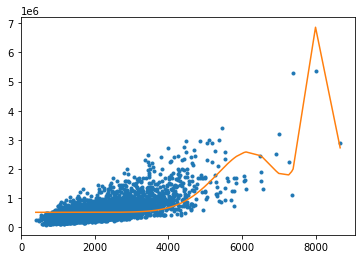

In [35]:
poly_set_2 = polynomial_sframe(set_2['sqft_living'],15)
poly_set_2['price'] = set_2['price']
model_set_2 = regressor.fit(poly_set_2.iloc[:,0:15], poly_set_2['price'].values.reshape(-1,1))
print(model_set_2.intercept_)
print(model_set_2.coef_)
plt.plot(poly_set_2['power_1'],poly_set_2['price'],'.',
         poly_set_2['power_1'], model_set_2.predict(poly_set_2.iloc[:,0:15]),'-')

[541469.96274734]
[[ 2.91296634e-91  8.12806629e-50 -2.07034799e-55 -2.48920611e-60
   1.03416817e-74  1.98665146e-71  1.72338793e-67  1.45618391e-63
   1.18181701e-59  9.01758248e-56  6.23236266e-52  3.61015489e-48
   1.40147071e-44 -2.15331334e-48  8.26074981e-53]]


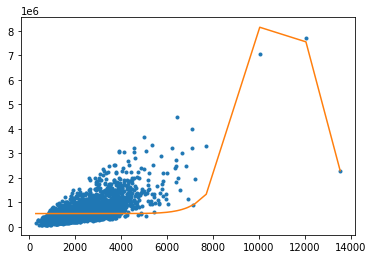

In [36]:
poly_set_3 = polynomial_sframe(set_3['sqft_living'],15)
poly_set_3['price'] = set_3['price']
model_set_3 = regressor.fit(poly_set_3.iloc[:,0:15], poly_set_3['price'].values.reshape(-1,1))
print(model_set_3.intercept_)
print(model_set_3.coef_)
plt.plot(poly_set_3['power_1'],poly_set_3['price'],'.',
         poly_set_3['power_1'], model_set_3.predict(poly_set_3.iloc[:,0:15]),'-')

[516055.46280992]
[[ 1.46320092e-78  9.03961413e-40 -1.86642474e-45  4.27569537e-50
  -2.61012179e-54  1.54940194e-59  4.38916404e-56  2.07990905e-52
   9.13165114e-49  3.55140038e-45  1.11750991e-41  2.22073993e-38
  -7.43915714e-42  8.28927434e-46 -3.07084091e-50]]


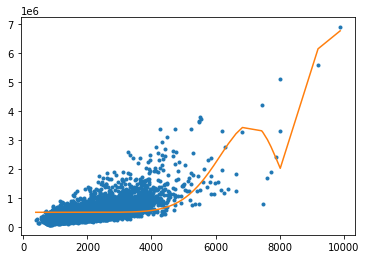

In [37]:
poly_set_4 = polynomial_sframe(set_4['sqft_living'],15)
poly_set_4['price'] = set_4['price']
model_set_4 = regressor.fit(poly_set_4.iloc[:,0:15], poly_set_4['price'].values.reshape(-1,1))
print(model_set_4.intercept_)
print(model_set_4.coef_)
plt.plot(poly_set_4['power_1'],poly_set_4['price'],'.',
         poly_set_4['power_1'], model_set_4.predict(poly_set_4.iloc[:,0:15]),'-')

In [180]:
training_and_validation, testing = train_test_split(sales, train_size = 0.9, random_state = 0)

In [181]:
print(sales.shape, trainning_and_validation.shape, testing.shape)

(21613, 21) (19451, 21) (2162, 21)


In [182]:
training, validation = train_test_split(training_and_validation, train_size = 0.5, random_state = 0)

In [183]:
print(training.shape, validation.shape)

(9725, 21) (9726, 21)


In [184]:
def poly_validation(train_feature, validation_feature, testing_feature, degree):
    RSS_list = []
    for power in range (1, degree+1):
        poly_train_data = polynomial_sframe(train_feature, power)
        features = poly_train_data.columns.values
        poly_train_data['price'] = training['price']
        model_train = regressor.fit(poly_train_data[features], poly_train_data['price'].values.reshape(-1,1))
        
        poly_validation_data = polynomial_sframe(validation_feature, power)
        poly_validation_data['price'] = validation['price']
        predicted_price = model_train.predict(poly_validation_data[features])
        poly_validation_data['predicted_price'] = predicted_price.flatten()
        residuals = poly_validation_data['price'] - poly_validation_data['predicted_price']
        RSS = sum(value**2 for value in residuals)
        RSS_list.append(RSS)
        
        poly_test_data = polynomial_sframe(testing_feature, power)
        poly_test_data['price'] = testing['price']
        predicted_test_price = model_train.predict(poly_test_data[features])
        poly_test_data['predicted_test_price'] = predicted_test_price.flatten()
        residuals_test = poly_test_data['price'] - poly_test_data['predicted_test_price']
        RSS_Test = sum(value **2 for value in residuals_test)
        
        print('RSS for degree {} is {}'.format(power, RSS))
        print('RSS TEST for degree {} is {}'.format(power,RSS_Test))
        print('\n')
    return(RSS_list)
    

In [185]:
RSS_list = poly_validation(training['sqft_living'], validation['sqft_living'], testing['sqft_living'], 15)

RSS for degree 1 is 635056630788102.9
RSS TEST for degree 1 is 140078799629191.1


RSS for degree 2 is 643529830899923.8
RSS TEST for degree 2 is 133630792485412.55


RSS for degree 3 is 654623682889718.0
RSS TEST for degree 3 is 133522878327889.94


RSS for degree 4 is 664493029915687.6
RSS TEST for degree 4 is 133243301808213.03


RSS for degree 5 is 647660953105183.6
RSS TEST for degree 5 is 133473062574382.0


RSS for degree 6 is 585707859717115.6
RSS TEST for degree 6 is 132575504658065.95


RSS for degree 7 is 1100346827602876.4
RSS TEST for degree 7 is 132128137134622.8


RSS for degree 8 is 6837637989805632.0
RSS TEST for degree 8 is 136823103761886.94


RSS for degree 9 is 4.043041839030736e+16
RSS TEST for degree 9 is 147553072956664.62


RSS for degree 10 is 1.8292571557806685e+17
RSS TEST for degree 10 is 163608407337644.0


RSS for degree 11 is 6.534766609789446e+17
RSS TEST for degree 11 is 183102445639981.56


RSS for degree 12 is 1.9165675720356675e+18
RSS TEST for degr

In [186]:
min(RSS_list)

585707859717115.6

In [ ]:
poly_test_data = polynomial_sframe(testing['sqft_living'], 2)
features = poly_test_data.columns.values
